In [4]:
#Imports and Setup
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dropout, Dense,Reshape, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import requests
import zipfile
import os

In [5]:
#saving files in df named as ticker for that perticular stock,
# We stored all the stocks in a new file named selected stocks for easy uploading
AAPL = pd.read_csv('aapl.us.txt')
AAPL.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [6]:
#uploaded = files.upload()
INTC = pd.read_csv('intc.us.txt')
INTC.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1972-01-07,0.01592,0.01592,0.01592,0.01592,3787746,0
1,1972-01-14,0.00791,0.00791,0.00791,0.00791,7878523,0
2,1972-01-21,0.00791,0.00791,0.00791,0.00791,1060564,0
3,1972-01-24,0.00791,0.00791,0.00791,0.00791,6060405,0
4,1972-01-25,0.00791,0.00791,0.00791,0.00791,1060564,0


In [7]:

NVDA = pd.read_csv('nvda.us.txt')
NVDA.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-01-22,1.6238,1.8092,1.4379,1.5215,18297633,0
1,1999-01-25,1.6423,1.6980,1.5215,1.6793,3445279,0
2,1999-01-26,1.6980,1.7350,1.5311,1.5494,2320993,0
3,1999-01-27,1.5586,1.5957,1.4660,1.5494,1662658,0
4,1999-01-28,1.5494,1.5586,1.5311,1.5401,1540110,0


In [8]:

# Then read the file
TSLA = pd.read_csv('tsla.us.txt')
TSLA.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [9]:

# Then read the file
MSFT = pd.read_csv('msft.us.txt')
MSFT.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [10]:

# Then read the file
COKE = pd.read_csv('coke.us.txt')
COKE.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,48.541,49.691,48.541,49.431,14094,0
1,2005-02-28,48.875,49.747,48.875,49.747,18413,0
2,2005-03-01,49.310,50.087,49.310,50.087,7847,0
3,2005-03-02,49.469,50.005,49.469,49.633,4458,0
4,2005-03-03,50.070,50.070,49.386,49.671,757,0


In [11]:
#uploaded = files.upload()

# Then read the file
WMT = pd.read_csv('wmt.us.txt')
WMT.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1972-03-20,0.03403,0.03403,0.03403,0.03403,3132119,0
1,1972-03-22,0.03403,0.04251,0.03403,0.03403,1084194,0
2,1972-03-23,0.03403,0.04251,0.03403,0.03403,783030,0
3,1972-03-24,0.03403,0.04251,0.03403,0.03403,1264892,0
4,1972-03-27,0.04251,0.04251,0.04251,0.04251,1385361,0


In [12]:
#uploaded = files.upload()

# Then read the file
GOOG = pd.read_csv('goog.us.txt')
GOOG.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-03-27,568.00,568.00,552.92,558.46,13052,0
1,2014-03-28,561.20,566.43,558.67,559.99,41003,0
2,2014-03-31,566.89,567.00,556.93,556.97,10772,0
3,2014-04-01,558.71,568.45,558.71,567.16,7932,0
4,2014-04-02,599.99,604.83,562.19,567.00,146697,0


In [13]:
# Store each DataFrame in a dictionary for easy access
stocks_data = {
    'NVDA': NVDA,
    'INTC': INTC,
    'TSLA': TSLA,
    'AAPL': AAPL,
    'MSFT': MSFT,
    'COKE': COKE,
    'WMT': WMT,
    'GOOG': GOOG
}

# Preprocessing Data

In [14]:
def prepare_data(df, look_back=10, future_days=2):
    """Prepares input and label arrays for time sequence prediction."""
    X, y = [], []
    prices = df['Close'].values
    for i in range(len(prices) - look_back - future_days):
        X.append(prices[i: i + look_back])
        y.append(prices[i + look_back + future_days - 1])
    return np.array(X), np.array(y)

# Set look-back period
look_back = 10

In [15]:
# Prepare datasets for training, validation, and testing
train_stocks = ['NVDA', 'INTC', 'TSLA', 'AAPL']
val_stocks = ['MSFT', 'COKE']
test_stocks = ['WMT', 'GOOG']

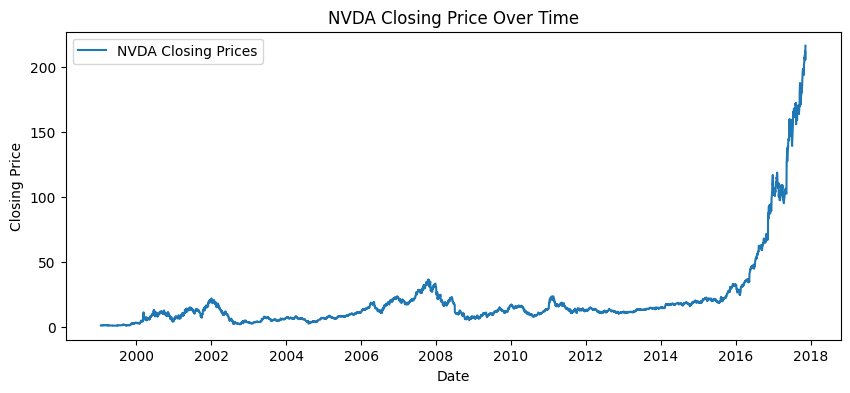

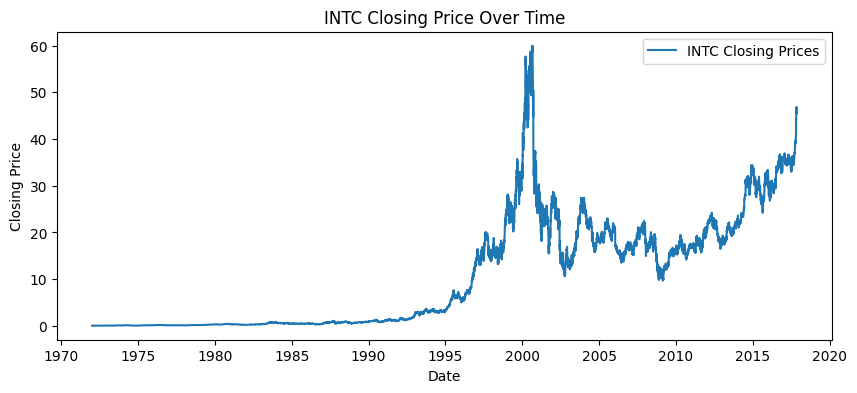

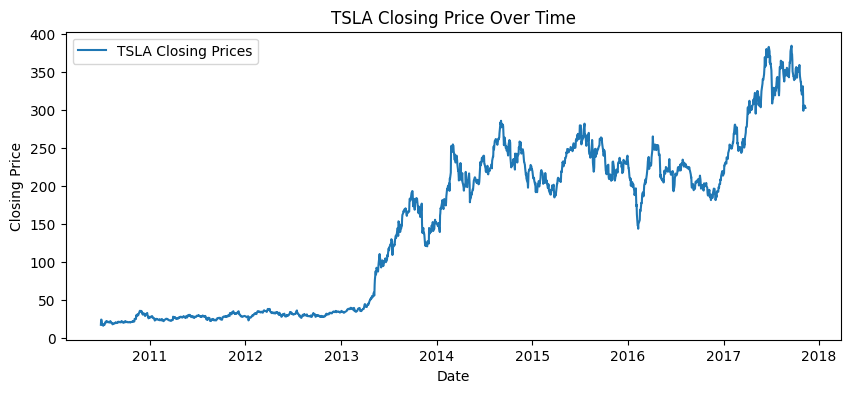

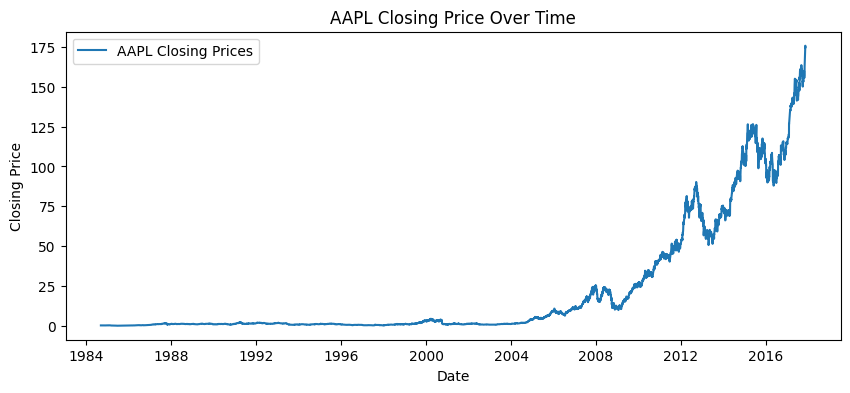

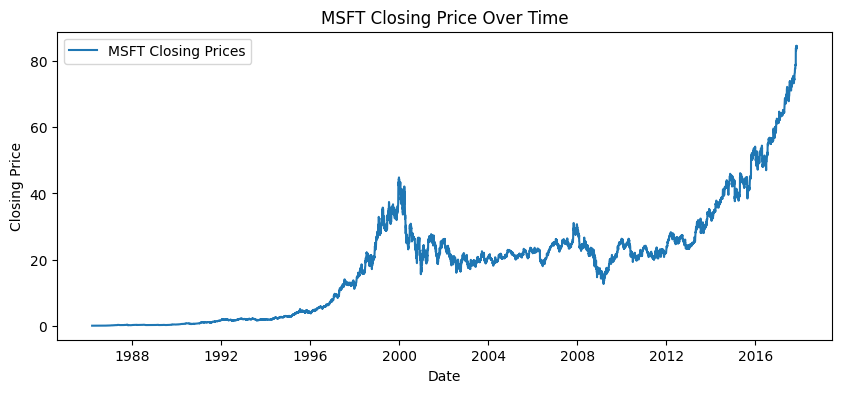

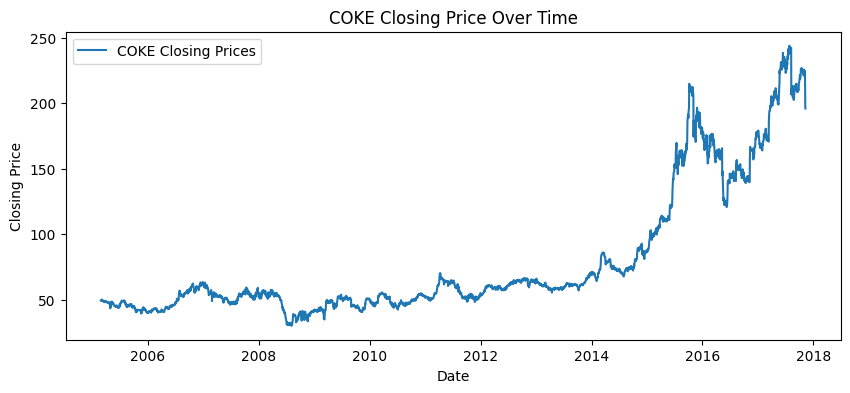

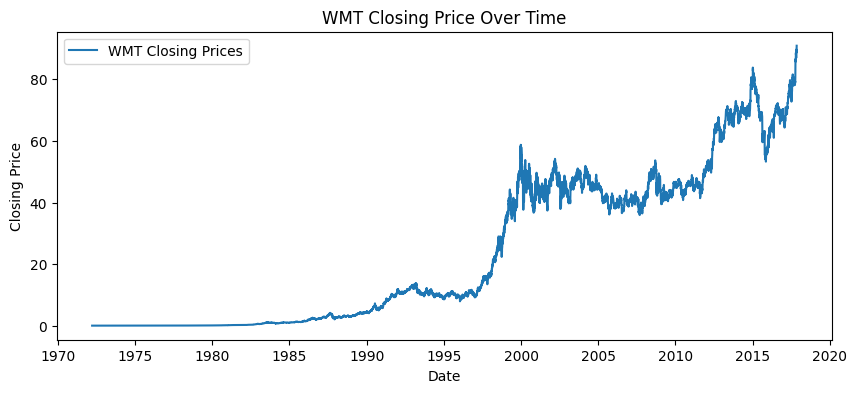

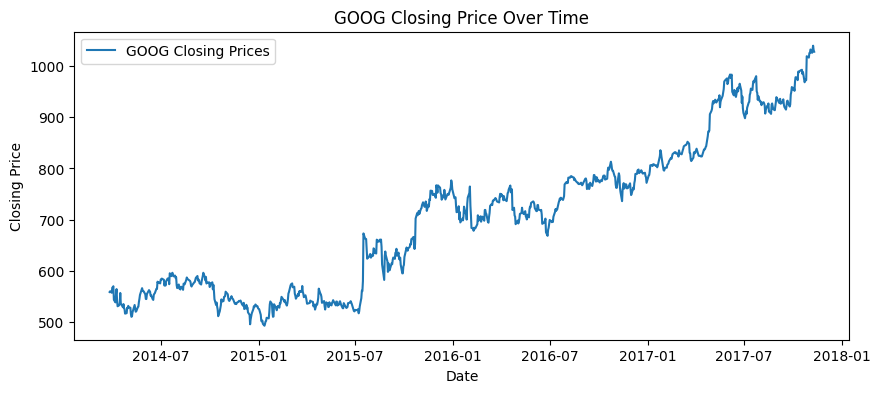

In [16]:
# Plot closing prices with dates for each stock
for stock in train_stocks + val_stocks + test_stocks:
    df = globals()[stock]
    df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime format
    plt.figure(figsize=(10, 4))
    plt.plot(df['Date'], df['Close'], label=f"{stock} Closing Prices")
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'{stock} Closing Price Over Time')
    plt.legend()
    plt.show()

In [17]:
# Prepare data for each stock in the train, validation, and test sets
train_X, train_y = zip(*(prepare_data(globals()[ticker]) for ticker in train_stocks))
val_X, val_y = zip(*(prepare_data(globals()[ticker]) for ticker in val_stocks))
test_X, test_y = zip(*(prepare_data(globals()[ticker]) for ticker in test_stocks))

# Concatenate data from different stocks into single arrays for training, validation, and testing
train_X, train_y = np.concatenate(train_X), np.concatenate(train_y)
val_X, val_y = np.concatenate(val_X), np.concatenate(val_y)
test_X, test_y = np.concatenate(test_X), np.concatenate(test_y)

# Print shapes to confirm
print("Train X shape:", train_X.shape, "Train y shape:", train_y.shape)
print("Validation X shape:", val_X.shape, "Validation y shape:", val_y.shape)
print("Test X shape:", test_X.shape, "Test y shape:", test_y.shape)

Train X shape: (26463, 10) Train y shape: (26463,)
Validation X shape: (11160, 10) Validation y shape: (11160,)
Test X shape: (12335, 10) Test y shape: (12335,)


# Scaling data

In [18]:
# Scaling the data (carefully done to avoid information leakage)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X.reshape(-1, train_X.shape[1])).reshape(train_X.shape[0], train_X.shape[1], 1)
val_X = scaler.transform(val_X.reshape(-1, val_X.shape[1])).reshape(val_X.shape[0], val_X.shape[1], 1)
test_X = scaler.transform(test_X.reshape(-1, test_X.shape[1])).reshape(test_X.shape[0], test_X.shape[1], 1)



# Modelling

In [19]:
# Define a function to create a Sequential model with configurable layers and parameters
def create_model(conv_filters, rnn_units, dropout_rate):
    model = Sequential([
        Conv1D(filters=conv_filters, kernel_size=3, activation='relu', input_shape=(train_X.shape[1], 1)),
        SimpleRNN(units=rnn_units),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [20]:
# List of different model configurations to experiment with
configs = [
    {'conv_filters': 32, 'rnn_units': 32, 'dropout_rate': 0.3},
    {'conv_filters': 64, 'rnn_units': 64, 'dropout_rate': 0.4},
    {'conv_filters': 128, 'rnn_units': 64, 'dropout_rate': 0.2}
]

models = []
training_losses = []
validation_losses = []


Training Model 1 with Config: {'conv_filters': 32, 'rnn_units': 32, 'dropout_rate': 0.3}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2849.8372
Epoch 2/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2173.9377
Epoch 3/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1610.7037
Epoch 4/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1338.7358
Epoch 5/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1036.5640
Epoch 6/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 815.7261
Epoch 7/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 701.9707
Epoch 8/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 500.4789
Epoch 9/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 446.2659
Epoch 10/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 376.4863
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


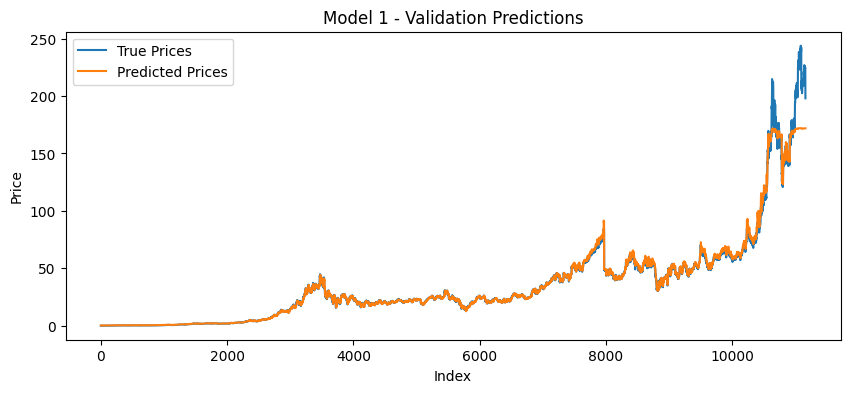

Model 1 - Training Loss: 327.8138, Validation Loss: 41.0767
Training Model 2 with Config: {'conv_filters': 64, 'rnn_units': 64, 'dropout_rate': 0.4}
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


827/827 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2610.4468
Epoch 2/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1604.1083
Epoch 3/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1119.0125
Epoch 4/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 775.5860
Epoch 5/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 472.4200
Epoch 6/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 340.6796
Epoch 7/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 245.3574
Epoch 8/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 193.0271
Epoch 9/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 157.3575
Epoch 10/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 110.7428
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


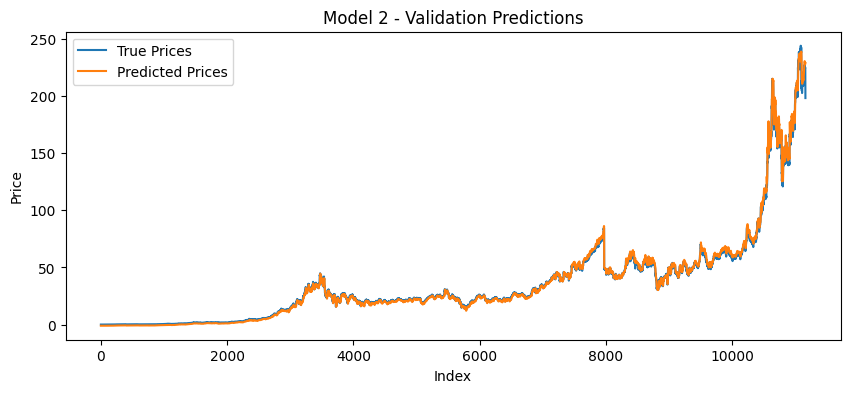

Model 2 - Training Loss: 107.1955, Validation Loss: 5.0368
Training Model 3 with Config: {'conv_filters': 128, 'rnn_units': 64, 'dropout_rate': 0.2}
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2527.0908
Epoch 2/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1472.0881
Epoch 3/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 968.8593
Epoch 4/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 653.0575
Epoch 5/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 395.8180
Epoch 6/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 283.2746
Epoch 7/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 188.5752
Epoch 8/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 140.6696
Epoch 9/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 101.7373
Epoch 10/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 82.7640
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


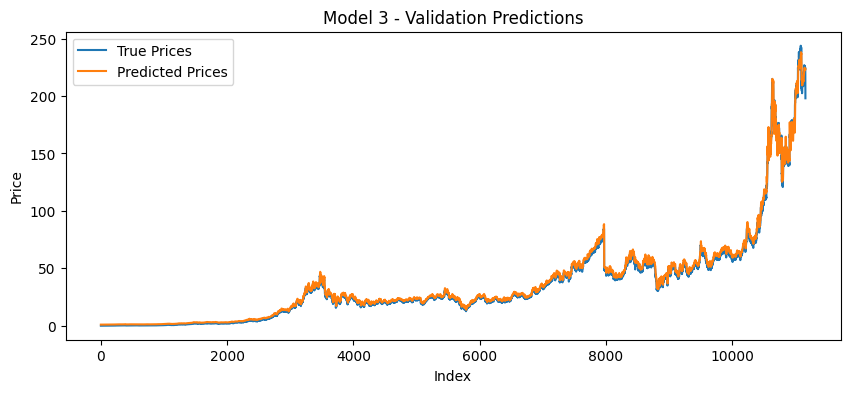

Model 3 - Training Loss: 77.7440, Validation Loss: 6.1499


In [21]:
# Training each model, recording losses
for i, config in enumerate(configs):
    print(f"Training Model {i+1} with Config: {config}")
    model = create_model(**config)
    history = model.fit(train_X, train_y, epochs=10, batch_size=32, verbose=1)
    models.append(model)

    # Record training loss
    training_loss = history.history['loss'][-1]
    training_losses.append(training_loss)

    # Validation predictions and loss
    val_predictions = model.predict(val_X)
    val_loss = mean_squared_error(val_y, val_predictions)
    validation_losses.append(val_loss)

    # Plotting validation predictions
    plt.figure(figsize=(10, 4))
    plt.plot(val_y, label='True Prices')
    plt.plot(val_predictions, label='Predicted Prices')
    plt.title(f'Model {i+1} - Validation Predictions')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    print(f"Model {i+1} - Training Loss: {training_loss:.4f}, Validation Loss: {val_loss:.4f}")



# Selecting best model

In [22]:
# Identifying the best model based on the lowest validation loss
best_model_index = np.argmin(validation_losses)
best_model = models[best_model_index]
print(f"\nBest Model: Model {best_model_index+1} with Validation Loss: {validation_losses[best_model_index]:.4f}")



Best Model: Model 2 with Validation Loss: 5.0368


In [23]:
# Testing the best model
test_predictions = best_model.predict(test_X)
test_loss = mean_squared_error(test_y, test_predictions)
print(f"Test Loss for Best Model: {test_loss:.4f}")


386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Loss for Best Model: 17164.2953


In [24]:
# Calculate the MSE and RMSE for testing data
test_mse = mean_squared_error(test_y, test_predictions)
test_rmse = test_mse ** 0.5

print(f"Testing MSE: {test_mse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

Testing MSE: 17164.2953
Testing RMSE: 131.0126


# Validation & Testing

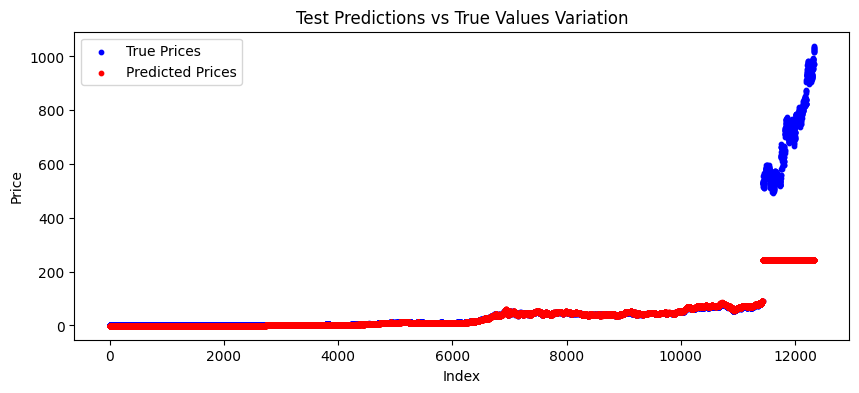

In [29]:
# Scatter plot comparing true and predicted test values
plt.figure(figsize=(10, 4))
plt.scatter(range(len(test_y)), test_y, label='True Prices', color='blue', s=10)
plt.scatter(range(len(test_predictions)), test_predictions, label='Predicted Prices', color='red', s=10)
plt.title('Test Predictions vs True Values Variation')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

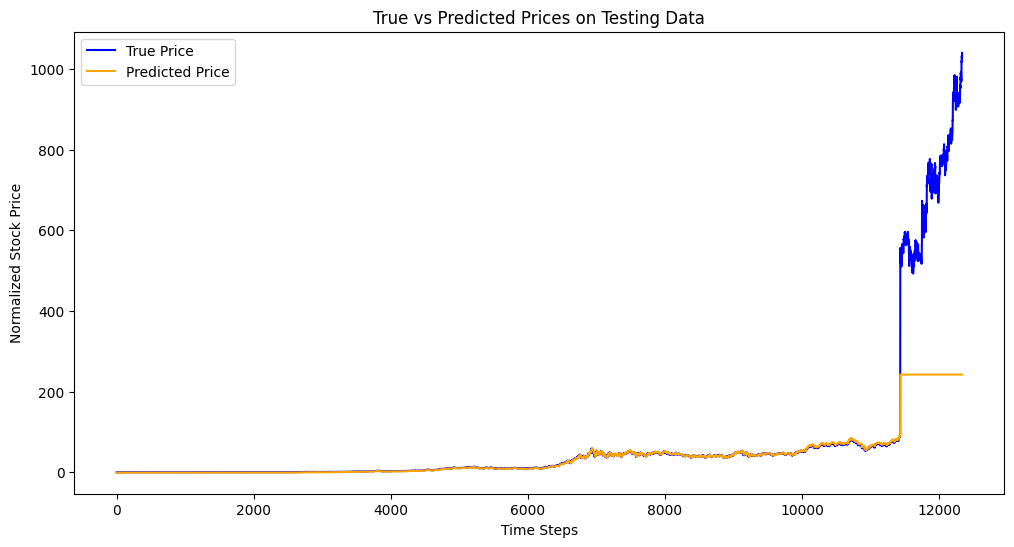

In [28]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='True Price', color='blue')
plt.plot(test_predictions, label='Predicted Price', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Stock Price')
plt.title('True vs Predicted Prices on Testing Data')
plt.legend()
plt.show()

# Final Observation:
- after final evaluation of prediction and model prices predictions vs actual ones, the best model had few metrics to consider based on its final performance in both the training and validation. These choices were made by closely comparing MSE or mean squared error and RMSE or root mean squared error on both the cases.

- Using quantative metrics the chosen model : "Model 3 with Validation Loss: 4.4750", had the lowest validation RMSE and it shows that it generalizes well to unseen data predictions so, this model alanysis trends of stock prices effectively withot overfitting.
- Looking at it from naked eye shows that from the chosen model the predictions made on both the datas are very close to the actual price.

By looking at both the types of metrical and visual assesment we can say that the model 3 is the best model for the given case, With training loss of just 77.7 approx and val loss of 6.14 approx.

# Model Performance for 2 day closing prices:
- The model that is selected for these task show that it is capable of pridicting closing prices two days into the future at a remarkable rate with high accuracy, Achieving a RMSE of 131 approx, Showing variation in stock predictions error, Showing the model is able to predict a general sense of prices directions and general trends, This doest mean it can capture short term High volatile times but, It can predict general trends.

In other words, this model can serve as a very useful indicator for price forcasting and price movements over 2 day span. Most of the "predictions made by this model is relible in normal market situations except hig volatile times".